In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Funtions def for data cleaning

In [14]:
muestra = lambda a: a.split('/')[0].split('_')[0]

def separa(a): 
    if len(list(a))>2:
        return [list(a)[0],list(a)[1]+list(a)[-1]]
    else:
        return list(a)

dosis = lambda a: separa(a)[-1]
tipo  = lambda a: separa(a)[0]

Data Extraction

In [15]:
todos=pd.read_excel("ajustes.xlsx",sheet_name=None)
df = pd.concat(todos.values())


df['Muestra']=df['Archivo'].apply(muestra)
df['Dosis']=df['Muestra'].apply(dosis)
df['Tipo']=df['Muestra'].apply(tipo)

df.index=df['Tipo']

desired_order=['0','2','10','25']
df['Dosis'] = pd.Categorical(df['Dosis'], categories=desired_order, ordered=True)

df=df.astype({'Dosis':'int64'})
df.head()

,Archivo,Error,t1,t2,Amp,TM,M,Agr,Muestra,Dosis,Tipo
Tipo,,,,,,,,,,,
C,C0_1/C_1_indexes.txt,5.86141,20.221409,172.290715,78.058274,56.5,21437.547798,0.714585,C0,0,C
C,C0_2/C_2_indexes.txt,3.64434,16.376209,104.473668,86.919661,34.5,23633.810253,0.787794,C0,0,C
C,C0_3/C_3_indexes.txt,2.81762,12.398317,86.035864,88.192266,29.5,23961.213439,0.798707,C0,0,C
C,C0_4/C_4_indexes.txt,4.36871,20.144506,101.750425,85.759089,43.5,23070.298127,0.769010,C0,0,C
C,C0_5/C_5_indexes.txt,3.06937,12.431603,86.592129,89.297429,32.0,24215.845176,0.807195,C0,0,C


Analysis by single parameter

In [16]:
parametro='TM'

# Fittings with less than 5 % error
df1=df.loc[df['Error']<5]
df1.groupby('Muestra')[parametro].std()

Muestra
C0     6.101571
E10    5.543389
E2     5.392897
E25    6.884463
X10    5.930852
X2     5.911853
X25    2.327373
Name: TM, dtype: float64

In [19]:
grupo=df1.groupby('Muestra')[parametro]
df_param=pd.DataFrame({'Prom':grupo.mean().values,'Desvi':grupo.std().values},index=grupo.mean().index)
df_param['Error_rel']=df_param['Desvi']/df_param['Prom']
df_param

,Prom,Desvi,Error_rel
Muestra,,,
C0,34.875,6.101571,0.174955
E10,38.875,5.543389,0.142595
E2,35.750,5.392897,0.150850
E25,36.625,6.884463,0.187972
X10,37.400,5.930852,0.158579
X2,34.700,5.911853,0.170370
X25,32.250,2.327373,0.072167


In [22]:
control=df1.loc[df1['Muestra']=='C0'][parametro]

p_valores=[]
for i in grupo.mean().index:
    muestra=df1.loc[df1['Muestra']==i][parametro]
    p=scipy.stats.ttest_ind(control,muestra)[-1]
    p_valores.append(p)

df_param['P_valor']=p_valores

df_param

,Prom,Desvi,Error_rel,P_valor
Muestra,,,,
C0,34.875,6.101571,0.174955,1.000000
E10,38.875,5.543389,0.142595,0.369305
E2,35.750,5.392897,0.150850,0.836962
E25,36.625,6.884463,0.187972,0.716703
X10,37.400,5.930852,0.158579,0.550640
X2,34.700,5.911853,0.170370,0.966500
X25,32.250,2.327373,0.072167,0.452101


In [36]:
df_param.to_csv(f'valores_{parametro}.csv')

Samples with significative difference against control "C0"

In [24]:
df_param.loc[df_param['P_valor']<0.05]

,Prom,Desvi,Error_rel,P_valor
Muestra,,,,


# Graphics

In [32]:
prom = df1.groupby('Dosis')['TM'].mean()
df1['TM_rel']=df1['TM']/prom[0]

/tmp/ipykernel_2738/2012506280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TM_rel']=df1['TM']/prom[0]


In [34]:
df1.head()

,Archivo,Error,t1,t2,Amp,TM,M,Agr,Muestra,Dosis,Tipo,TM_rel
Tipo,,,,,,,,,,,,
C,C0_2/C_2_indexes.txt,3.64434,16.376209,104.473668,86.919661,34.5,23633.810253,0.787794,C0,0,C,0.989247
C,C0_3/C_3_indexes.txt,2.81762,12.398317,86.035864,88.192266,29.5,23961.213439,0.798707,C0,0,C,0.845878
C,C0_4/C_4_indexes.txt,4.36871,20.144506,101.750425,85.759089,43.5,23070.298127,0.769010,C0,0,C,1.247312
C,C0_5/C_5_indexes.txt,3.06937,12.431603,86.592129,89.297429,32.0,24215.845176,0.807195,C0,0,C,0.917563
E,E2_2/E2_2_indexes.txt,3.59766,28.848696,109.652367,87.190668,40.5,23391.676833,0.779723,E2,2,E,1.161290


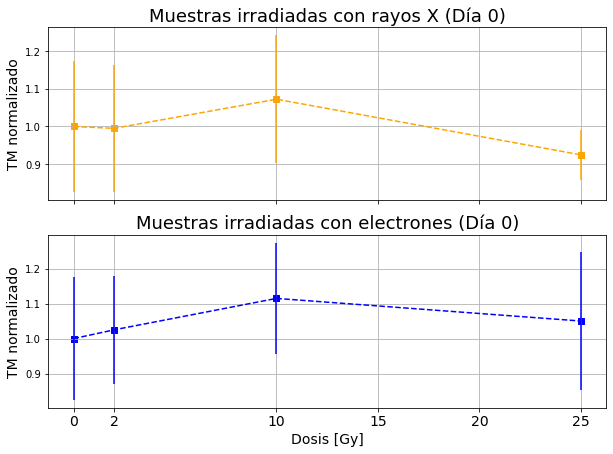

In [37]:
error=5

X=df1.loc[['C','X']]
E=df1.loc[['C','E']]


colores={0:'orange',1:'blue'}
titulo={0:'rayos X',1:'electrones'}

fig,axs=plt.subplots(nrows=2,figsize=(10,7),sharex=True)

for i, datita in enumerate([X,E]):
    prom = datita.groupby('Dosis')['TM'].mean()
    error= datita.groupby('Dosis')['TM_rel'].std()

    axs[i].errorbar(prom.index,prom/prom[0],yerr=error,linestyle='dashed',c=colores[i])
    axs[i].scatter(prom.index,prom/prom[0],marker='s',c=colores[i])

    axs[i].set_xticks([0,2,10,15,20,25])
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].grid()
    axs[i].set_ylabel('TM normalizado', fontsize=14)

    axs[i].set_title(f'Muestras irradiadas con {titulo[i]} (Día 0)', fontsize=18)
    
axs[-1].set_xlabel('Dosis [Gy]',fontsize=14)

plt.savefig('grafica_TM.jpg',dpi=300)